In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import datetime as ds
import numpy as np
import plotly.express as px
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential

In [1374]:
dataset = pd.read_excel("*******.xlsx")

In [ ]:
dataset.columns = ["il","ilce","yil","ay","sm3"]
dataset["il"].unique()

In [1376]:
dataset = dataset.sort_values("ay")
dataset.reset_index(inplace=True)
dataset.drop("index",axis = 1,inplace=True)

Verisetini Aylara Göre Sıraladığımızda Ekim-Mart Arasını Bir Datasete Nisan-Eylül Arasını bir datasete aktardık

In [ ]:
dataset_hot = dataset.loc[493:1486]
dataset_cold = dataset.loc[0:492]
dataset_cold = dataset_cold.append(dataset.loc[1487:1885])#1748

In [ ]:
dataset_cold["sm3"].std()

In [ ]:
dataset["sm3"].std()

In [ ]:
dataset_cold.std()

In [ ]:
dataset_hot = dataset.loc[660:1486]
dataset_cold = dataset.loc[0:659]
dataset_cold = dataset_cold.append(dataset.loc[1487:1885])

In [ ]:
dataset_cold.std()

Verisetini İllere göre ayır

In [1384]:
yozgat = dataset[dataset["il"] == 66].drop("il",axis  = 1)
kırşehir = dataset[dataset["il"] == 40].drop("il",axis  = 1)
bolu = dataset[dataset["il"] == 14].drop("il",axis  = 1)
çankırı = dataset[dataset["il"] == 18].drop("il",axis  = 1)
kastamonu = dataset[dataset["il"] == 37].drop("il",axis  = 1)
karabük = dataset[dataset["il"] == 78].drop("il",axis  = 1)
çorum = dataset[dataset["il"] == 19].drop("il",axis  = 1)

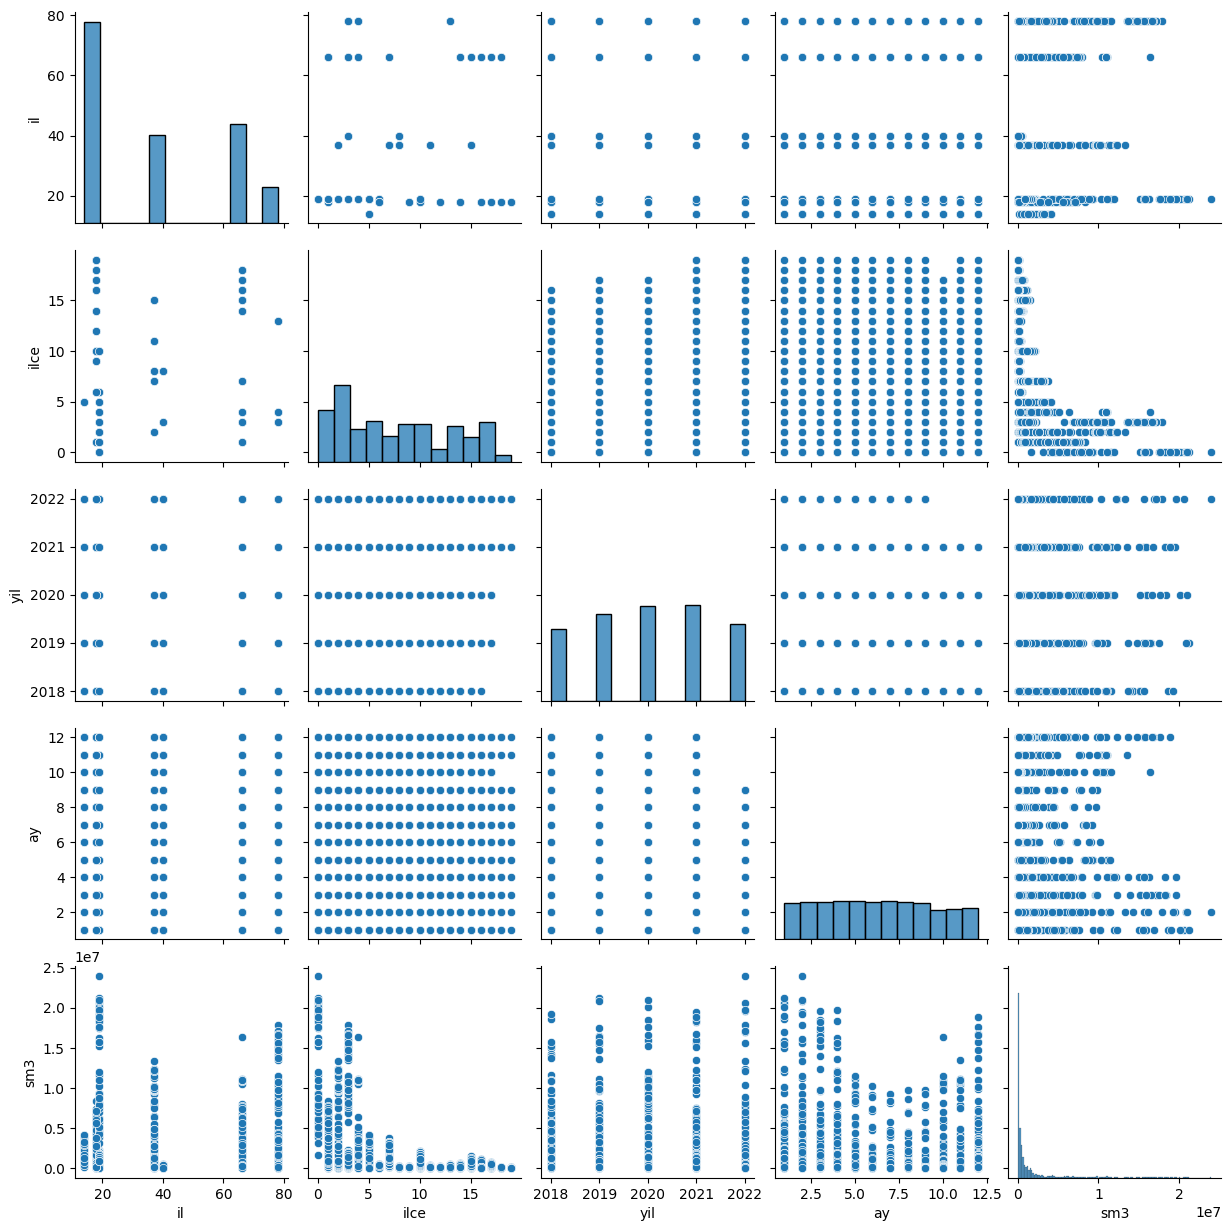

In [1385]:
sns.pairplot(dataset)

Yeni verisetlerini düzenli bir şekilde sırala

In [1386]:
yozgat = yozgat.sort_values(["yil","ilce","ay"])
kırşehir = kırşehir.sort_values(["ilce","yil","ay"])
bolu = bolu.sort_values(["ilce","yil","ay"])
çankırı = çankırı.sort_values(["ilce","yil","ay"])
kastamonu = kastamonu.sort_values(["ilce","yil","ay"])
karabük = karabük.sort_values(["ilce","yil","ay"])
çorum = çorum.sort_values(["ilce","yil","ay"])

In [1387]:
yozgat.reset_index(inplace=True)
yozgat.drop("index",axis = 1,inplace=True)
kırşehir.reset_index(inplace=True)
kırşehir.drop("index",axis = 1,inplace=True)
bolu.reset_index(inplace=True)
bolu.drop("index",axis = 1,inplace=True)
çankırı.reset_index(inplace=True)
çankırı.drop("index",axis = 1,inplace=True)
kastamonu.reset_index(inplace=True)
kastamonu.drop("index",axis = 1,inplace=True)
karabük.reset_index(inplace=True)
karabük.drop("index",axis = 1,inplace=True)
çorum.reset_index(inplace=True)
çorum.drop("index",axis = 1,inplace=True)

In [1388]:
yozgat.drop("ilce",axis = 1,inplace=True)
kırşehir.drop("ilce",axis = 1,inplace=True)
bolu.drop("ilce",axis = 1,inplace=True)
çankırı.drop("ilce",axis = 1,inplace=True)
kastamonu.drop("ilce",axis = 1,inplace=True)
karabük.drop("ilce",axis = 1,inplace=True)
çorum.drop("ilce",axis = 1,inplace=True)



In [1389]:
yozgat = pd.DataFrame(yozgat.groupby(["yil","ay"])["sm3"].sum())
kırşehir = pd.DataFrame(kırşehir.groupby(["yil","ay"])["sm3"].sum())
bolu = pd.DataFrame(bolu.groupby(["yil","ay"])["sm3"].sum())
çankırı = pd.DataFrame(çankırı.groupby(["yil","ay"])["sm3"].sum())
kastamonu = pd.DataFrame(kastamonu.groupby(["yil","ay"])["sm3"].sum())
karabük = pd.DataFrame(karabük.groupby(["yil","ay"])["sm3"].sum())
çorum = pd.DataFrame(çorum.groupby(["yil","ay"])["sm3"].sum())

In [1390]:
yozgat.reset_index(inplace=True)
kırşehir.reset_index(inplace=True)
bolu.reset_index(inplace=True)
çankırı.reset_index(inplace=True)
kastamonu.reset_index(inplace=True)
karabük.reset_index(inplace=True)
çorum.reset_index(inplace=True)


In [1391]:
yozgat["ds"] = yozgat["yil"].astype(str)+'-'+yozgat["ay"].astype(str)
yozgat["ds"] = pd.to_datetime(yozgat["ds"])
çorum["ds"] = çorum["yil"].astype(str)+'-'+çorum["ay"].astype(str)
çorum["ds"] = pd.to_datetime(çorum["ds"])

In [ ]:
yozgat.head()

In [1393]:
yozgat.drop(["yil","ay"],axis = 1 , inplace = True)
çorum.drop(["yil","ay"],axis = 1 , inplace = True)



In [1394]:
yozgat["y"] = yozgat["sm3"]
yozgat.drop("sm3",axis = 1,inplace = True)

çorum["y"] = çorum["sm3"]
çorum.drop("sm3",axis = 1,inplace = True)

In [ ]:
yozgat.head()

In [1396]:
x = yozgat["ds"]
y = yozgat["y"]

In [1398]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [1399]:
from prophet import Prophet
model = Prophet()


In [ ]:
model.fit(yozgat)

In [ ]:
future = list()
for i in range(1,13):
    date = "2022-%02d" % i
    future.append([date])
future = pd.DataFrame(future)

future.columns = ["ds"]
future["ds"] = pd.to_datetime(future["ds"])

forecast = model.predict(future)
future.columns = ["ds"]
future["ds"] = pd.to_datetime(future["ds"],format = '%Y')
future

In [1402]:
forecast = model.predict(future)

In [ ]:
forecast[["ds","yhat","yhat_lower","yhat_upper"]]

In [ ]:
model.plot(forecast)
plt.show()

In [ ]:
yozgat.loc[2:]

In [ ]:
plt.figure(figsize = (3, 3))
px.line(yozgat,x = yozgat["ds"].loc[48:],y = yozgat["y"].loc[48:])
#plt.legend(["forecast","actual"])

In [1407]:
y_true = yozgat["y"].loc[48:56].values
y_predict = forecast["yhat"].loc[0:8].values

In [ ]:

px.line(forecast,x = forecast["ds"], y = forecast["yhat"])

In [1409]:
from sklearn.metrics import mean_absolute_error

In [ ]:
print("%.2f"%mean_absolute_error(y_true,y_predict))

In [ ]:
plt.plot(y_true)
plt.plot(y_predict)

In [ ]:
r2_score(y_true,y_predict)

In [ ]:
px.line(forecast,x = forecast["ds"] , y = forecast["yhat"])

In [ ]:
plt.plot(yozgat["ds"].loc[48:],yozgat["y"].loc[48:],color = "red")
plt.plot(forecast["ds"],forecast["yhat"],color = "blue")

In [1415]:
model = Prophet()


In [1416]:
kırşehir["ds"] = kırşehir["yil"].astype(str)+'-'+kırşehir["ay"].astype(str)
kırşehir["ds"] = pd.to_datetime(kırşehir["ds"])

In [1417]:
kırşehir.drop(["yil","ay"],axis = 1 , inplace = True)
kırşehir["y"] = kırşehir["sm3"]
kırşehir.drop("sm3",axis = 1,inplace = True)

In [ ]:
model.fit(kırşehir)

In [ ]:
future = list()
for i in range(1,13):
    date = "2022-%02d" % i
    future.append([date])
future = pd.DataFrame(future)

future.columns = ["ds"]
future["ds"] = pd.to_datetime(future["ds"])

forecast = model.predict(future)
future.columns = ["ds"]
future["ds"] = pd.to_datetime(future["ds"],format = '%Y')
future

In [1420]:
forecast = model.predict(future)

In [ ]:
model.plot(forecast)
plt.show()

In [ ]:
px.line(kırşehir,x = kırşehir["ds"],y = kırşehir["y"])

In [1423]:
y_true = kırşehir["y"].loc[48:56].values
y_predict = forecast["yhat"].loc[0:8].values

In [ ]:
plt.plot(y_true)
plt.plot(y_predict)

In [ ]:
r2_score(y_true,y_predict)

In [ ]:
print("%.2f"%mean_absolute_error(y_true,y_predict))

In [ ]:
plt.plot(kırşehir["ds"].loc[48:],kırşehir["y"].loc[48:],color = "red")
plt.plot(forecast["ds"],forecast["yhat"],color = "blue")

plt.legend(["actual","predict"])

In [1428]:
model = Prophet()


In [1429]:
bolu["ds"] = bolu["yil"].astype(str)+'-'+bolu["ay"].astype(str)
bolu["ds"] = pd.to_datetime(bolu["ds"]) 
bolu.drop(["yil","ay"],axis = 1 , inplace = True)
bolu["y"] = bolu["sm3"]
bolu.drop("sm3",axis = 1,inplace = True)

In [ ]:
model.fit(bolu)

In [ ]:
future = list()
for i in range(1,13):
    date = "2022-%02d" % i
    future.append([date])
future = pd.DataFrame(future)

future.columns = ["ds"]
future["ds"] = pd.to_datetime(future["ds"])

forecast_bolu = model.predict(future)
future.columns = ["ds"]
future["ds"] = pd.to_datetime(future["ds"],format = '%Y')
future

In [1432]:
forecast_bolu = model.predict(future)

In [ ]:
model.plot(forecast_bolu)
plt.show()

In [ ]:
px.line(bolu,x = bolu["ds"],y = bolu["y"])

In [ ]:
bolu.loc[48:56]

In [ ]:
forecast_bolu.loc[0:8]

In [ ]:
y_true = bolu["y"].loc[48:56].values
y_predict = forecast_bolu["yhat"].loc[0:8].values
print("%.2f"%mean_absolute_error(y_true,y_predict))
plt.plot(y_true,color = "red")
plt.plot(y_predict,color = "blue")
plt.legend()
#517285.12

In [ ]:
r2_score(y_true,y_predict)

In [1439]:
model = Prophet()

In [1440]:
çankırı["ds"] = çankırı["yil"].astype(str)+'-'+çankırı["ay"].astype(str)
çankırı["ds"] = pd.to_datetime(çankırı["ds"])
çankırı.drop(["yil","ay"],axis = 1 , inplace = True)
çankırı["y"] = çankırı["sm3"]
çankırı.drop("sm3",axis = 1,inplace = True)

In [ ]:
model.fit(çankırı)

In [ ]:
future = list()
for i in range(1,13):
    date = "2022-%02d" % i
    future.append([date])
future = pd.DataFrame(future)

future.columns = ["ds"]
future["ds"] = pd.to_datetime(future["ds"])

forecast = model.predict(future)
future.columns = ["ds"]
future["ds"] = pd.to_datetime(future["ds"],format = '%Y')
future

In [1443]:
forecast = model.predict(future)

In [ ]:
model.plot(forecast)
plt.show()

In [ ]:
forecast["yhat"]

In [ ]:
bolu.loc[48:56]

In [ ]:
y_true = çankırı["y"].loc[48:56].values
y_predict = forecast["yhat"].loc[0:8].values
print("%.2f"%mean_absolute_error(y_true,y_predict))
plt.plot(y_true)
plt.plot(y_predict)
plt.legend()

### MAKİNE ÖĞRENMESİ

In [1448]:
from sklearn.model_selection import train_test_split

In [1449]:
y = np.array(bolu["y"].values).reshape(-1,1)
x = np.array(bolu["ds"].values).reshape(-1,1)

In [1450]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
x_train.shape

In [ ]:
x_test.shape

In [1453]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [1454]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [1455]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

In [1456]:
model = Sequential()

In [1457]:
model.add(Dense(25,activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(15,activation = "relu"))

model.add(Dropout(0.5))
model.add(Dense(35,activation = "relu"))

model.add(Dropout(0.5))
model.add(Dense(15,activation = "relu"))

model.add(Dropout(0.5))
model.add(Dense(25,activation = "relu"))

model.add(Dropout(0.5))

model.add(Dense(1))
model.compile(optimizer = "adam",loss = "mse")

In [1459]:
stopping = EarlyStopping(monitor="val_loss",mode = "min",verbose = 1 ,patience=25)
# lr_schedule = tf.keras.callbacks.LearningRateScheduler(
#     lambda epoch: 1e-8 * 10 ** (epoch / 20))

In [1460]:
import tensorflow as tf

In [ ]:
model.fit(x= x_train,y = y_train ,
          epochs = 6010,
          validation_data=(x_test,y_test),
          callbacks = [stopping])

In [ ]:
kayip = pd.DataFrame(model.history.history)
kayip.plot()

In [ ]:
mean_absolute_error(y_test,tahmin)